## **Linear Regression end to end** ##

In [1]:
from IPython.display import display, Math, Latex

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


%matplotlib inline


In [49]:
class LinReg(object):

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X:np.ndarray)->np.ndarray:
        assert X.shape[-1]==self.w.shape[0]
        return X@self.w


    def loss (self, X:np.ndarray,y:np.ndarray) -> float:
        e = self.predict(X) - y
        # print(e)
        return 0.5*(np.transpose(e)@e)

    def rmse( self, X:np.ndarray, y:np.ndarray)->float:
        return np.sqrt((2/X.shape[0]) * self.loss(X,y))       #check def?

    def fit(self, X:np.ndarray, y:np.ndarray) ->np.ndarray:
        self.w = np.linalg.pinv(X)@y
        return self.w

    
    def calc_grad(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        return np.transpose(X)@(self.predict(X)-y)

    def weightupdate(self, grad:np.ndarray , lr:float)->np.ndarray:
        return (self.w - lr*grad)
    
    def learning_schedule(self, t):
        return self.t0/(t+self.t1)

    def gradient_descent(self, X:np.ndarray,y:np.ndarray, lr:float, num_epochs:int)->np.ndarray:
        self.w_all = []
        self.err_all = []

        self.w = np.zeros((X.shape[1]))

        # print()

        for i in np.arange(0,num_epochs):
            self.w_all.append(self.w)

            self.err_all.append(self.loss(X,y))

            djdw = self.calc_grad(X,y)

            # if i%100 == 0:
            # print("Iteration: %d, loss: %4.2f" %(i, err_all[-1]))

            self.w = self.weightupdate(djdw,lr)

        return self.w, self.err_all, self.w_all

    def mini_batch_gd(self, X:np.ndarray, y:np.ndarray, num_inter:int, minibatch_size:int):
        self.w_all = []
        self.err_all = []

        self.w = np.zeros(X.shape[1])   #num of feataures
        t = 0
        # print("step 1")
        for epoch in range(num_inter):

            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for i in range(0,X.shape[0], minibatch_size):
                t+=1
                # print(t)
                xi = X_shuffled[i:i+minibatch_size]
                yi = y_shuffled[i:i+minibatch_size]
                self.err_all.append(self.loss(xi,yi))

                gradients = 2/minibatch_size * self.calc_grad(xi,yi)   #why?
                # print()
                self.w = self.weightupdate(gradients, self.learning_schedule(t))
                self.w_all.append(self.w)

        return self.w

    def sgd(self,X:np.ndarray, y:np.ndarray, num_epochs:int)->np.ndarray:
        self.w_all = []
        self.err_all = []

        self.w = np.zeros(X.shape[1])   #num of feataures
        # t = 0

        for epoch in range(num_epochs):
            for i in range((X.shape[1])):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                self.err_all.append(self.loss(xi,yi))
                gradients = self.calc_grad(xi,yi) 
                lr = self.learning_schedule(epoch * X.shape[0] + i)  #dynamic learning rate

                self.w = self.weightupdate(gradients, lr)
                self.w_all.append(self.w)

        return self.w

In [26]:
def generate_data(n):
    w1 = 3
    w0 = 4
    X = 10 * np.random.rand(n,)
    y = w0+w1*X+np.random.rand(n,)
    return X,y

def add_dummy(x):
  return np.column_stack((np.ones(x.shape[0]),x))  #input - tuple

def preprocess(X,y):
    X_dummy = add_dummy(X)
    return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [27]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

In [50]:
lin_reg = LinReg()
lin_reg.fit(X_train,y_train)

print("Weight vector: ", lin_reg.w)

Weight vector:  [4.30868690e-03 4.00335228e+01 1.03086790e+01 5.19091277e+01
 6.29286567e+00 4.11625781e+01 2.84422862e+01 8.89543306e+01
 9.75752481e+00 1.54723974e+01 4.49980952e+01]


In [33]:
lin_reg.gradient_descent(X_train,y_train,  lr = 1e-4, num_epochs =1000)

print("Weight vector: ", lin_reg.w)


Weight vector:  [3.97353508 3.08100241]


In [34]:
lin_reg.mini_batch_gd(X_train, y_train, 1000, 14)

print("Weight vector: ", lin_reg.w)

Weight vector:  [4.49551481 3.00563486]


In [36]:
lin_reg.sgd(X_train, y_train, 10000)
print("Weight vector: ", lin_reg.w)

Weight vector:  [4.25802772 3.03870169]


In [37]:
def plot_learning_curve(err_all):
    plt.plot(err_all)
    plt.xlabel("iter#")
    plt.ylabel("loss")

Lin Reg on multiple features and single label

In [52]:
from sklearn.datasets import make_regression
X,y,coef = make_regression(n_samples = 200, n_features = 10, n_informative = 10, n_targets = 1, shuffle = True, coef = True,
                                noise = 0.5, random_state = 0)   # same as random_seed

In [53]:
print ("Shape of feature: ", X.shape)
print("Shape of label: ", y.shape)
print("Shape of coef vector: ", coef.shape)

Shape of feature:  (200, 10)
Shape of label:  (200,)
Shape of coef vector:  (10,)


In [54]:
X_train, X_test, y_train, y_test = preprocess(X,y)

In [55]:
lin_reg.fit(X_train, y_train)
print("Weight: normal: ", lin_reg.w)

Weight: normal:  [4.30868690e-03 4.00335228e+01 1.03086790e+01 5.19091277e+01
 6.29286567e+00 4.11625781e+01 2.84422862e+01 8.89543306e+01
 9.75752481e+00 1.54723974e+01 4.49980952e+01]


In [56]:
# check if coefficients are close
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal = 0)

In [58]:
lin_reg.gradient_descent(X_train, y_train, lr = 1e-4, num_epochs= 1000)
print("Weight: ", lin_reg.w)

Weight:  [4.23513204e-03 4.00335497e+01 1.03081869e+01 5.19092201e+01
 6.29241093e+00 4.11619488e+01 2.84422549e+01 8.89543222e+01
 9.75811687e+00 1.54722408e+01 4.49977615e+01]


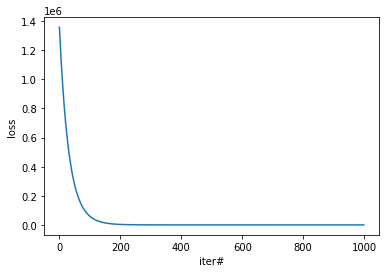

In [59]:
plot_learning_curve(lin_reg.err_all)

In [62]:
lin_reg.mini_batch_gd(X_train, y_train, num_inter=1000 , minibatch_size=16)

array([4.25832412e-03, 4.00335121e+01, 1.03087197e+01, 5.19091186e+01,
       6.29291429e+00, 4.11625858e+01, 2.84422956e+01, 8.89543064e+01,
       9.75750850e+00, 1.54724649e+01, 4.49981233e+01])

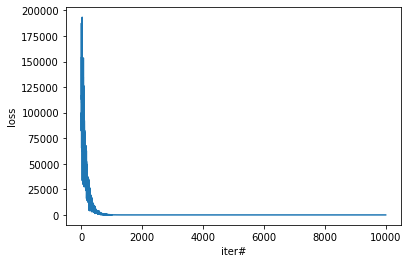

In [63]:
plot_learning_curve(lin_reg.err_all)

In [64]:
lin_reg.sgd(X_train, y_train, 1000)

array([1.97280818e-03, 4.00321493e+01, 1.03180745e+01, 5.19075236e+01,
       6.30051073e+00, 4.11503349e+01, 2.84362245e+01, 8.89415228e+01,
       9.75465851e+00, 1.54688933e+01, 4.50000919e+01])

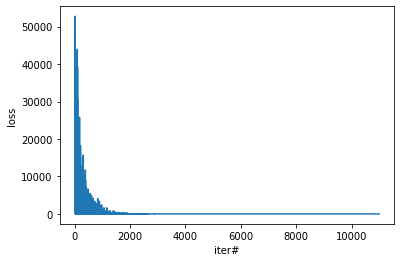

In [65]:
plot_learning_curve(lin_reg.err_all)